# Shells

## Init symbols for *sympy*

In [99]:
from sympy import *
from sympy.vector import CoordSys3D
N = CoordSys3D('N')
x1, x2, x3 = symbols("x_1 x_2 x_3")
alpha1, alpha2, alpha3 = symbols("alpha_1 alpha_2 alpha3")
R, L, ga, gv = symbols("R L g_a g_v")
init_printing()

## Cylindrical coordinates

In [100]:
a1 = pi / 2 + (L / 2 - alpha1)/R

x = R * cos(a1)
y = alpha2
z = R * sin(a1)

r = x*N.i + y*N.j + z*N.k

#### Midpane coordinates system will be defined with the following vector $\vec{r}=\vec{r}(\alpha_1, \alpha_2)$

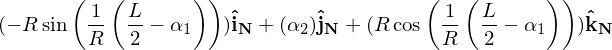

In [101]:
r

#### Tangent to curve

In [102]:
r1 = r.diff(alpha1)
r2 = r.diff(alpha2)
k1 = trigsimp(r1.magnitude()**3)
k2 = trigsimp(r2.magnitude()**3)
r1 = r1/k1 
r2 = r2/k2

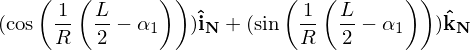

In [103]:
r1

In [104]:
r2

#### Normal to curve

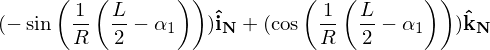

In [105]:
n = r1.cross(r2)
n = trigsimp(n.normalize())
n

#### Curvature

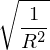

In [106]:
dr1=r1.diff(alpha1)
k1 = trigsimp(r1.cross(dr1).magnitude()/k1)
k1

In [107]:
dr2=r2.diff(alpha2)
k2 = trigsimp(r2.cross(dr2).magnitude()/k2)
k2

#### Derivative of base vectors
Let's find 
$\frac { d\vec{n} } { d\alpha_1}$
$\frac { d\vec{v} } { d\alpha_1}$
$\frac { d\vec{n} } { d\alpha_2}$
$\frac { d\vec{v} } { d\alpha_2}$

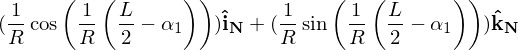

In [108]:
n.diff(alpha1)

$ \frac { d\vec{n} } { d\alpha_1} = -\frac {1}{R} \vec{v} = -k \vec{v} $

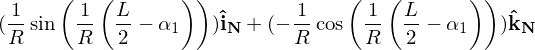

In [109]:
r1.diff(alpha1)

$ \frac { d\vec{v} } { d\alpha_1} = \frac {1}{R} \vec{n} = k \vec{n} $

#### Derivative of vectors

$ \vec{u} = u_v \vec{v} + u_n\vec{n} $

$ \frac { d\vec{u} } { d\alpha_1} =  \frac { d(u_v\vec{v}) } { d\alpha_1} + \frac { d(u_n\vec{n}) } { d\alpha_1} = 
 \frac { du_n } { d\alpha_1} \vec{n} + u_n \frac { d\vec{n} } { d\alpha_1} + \frac { du_v } { d\alpha_1} \vec{v} + u_v \frac { d\vec{v} } { d\alpha_1} = \frac { du_n } { d\alpha_1} \vec{n} - u_n k \vec{v} + \frac { du_v } { d\alpha_1} \vec{v} + u_v k \vec{n}$

Then
$ \frac { d\vec{u} } { d\alpha_1} = \left( \frac { du_v } { d\alpha_1} - u_n k \right) \vec{v} + \left( \frac { du_n } { d\alpha_1} + u_v k \right) \vec{n}$

$ \frac { d\vec{u} } { d\alpha_2} = \frac { d(u_n\vec{n}) } { d\alpha_2} + \frac { d(u_v\vec{v}) } { d\alpha_2} = 
 \frac { du_n } { d\alpha_2} \vec{n} + u_n \frac { d\vec{n} } { d\alpha_2} + \frac { du_v } { d\alpha_2} \vec{v} + u_v \frac { d\vec{v} } { d\alpha_2} = \frac { du_n } { d\alpha_2} \vec{n} + \frac { du_v } { d\alpha_2} \vec{v} $

#### Base Vectors $\vec{R}_1, \vec{R}_2, \vec{R}_3$

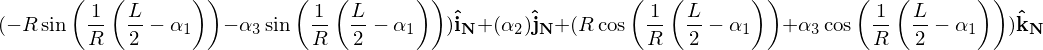

In [110]:
R_alpha=r+alpha3*n
R_alpha

In [111]:
R1=R_alpha.diff(alpha1)
R2=R_alpha.diff(alpha2)
R3=R_alpha.diff(alpha3)

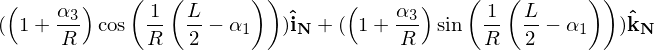

In [112]:
trigsimp(R1)

In [113]:
R2

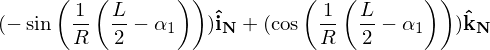

In [114]:
R3

#### Base Vectors $\vec{R}^1, \vec{R}^2, \vec{R}^3$

In [115]:
eps=trigsimp(R1.dot(R2.cross(R3)))
R_1=simplify(trigsimp(R2.cross(R3)/eps))
R_2=simplify(trigsimp(R3.cross(R1)/eps))
R_3=simplify(trigsimp(R1.cross(R2)/eps))

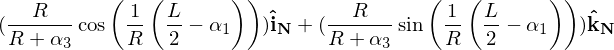

In [116]:
R_1

In [117]:
R_2

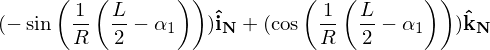

In [118]:
R_3

#### Let's find Jacobi matrix:

$ A = \left( 
\begin{array}{ccc} 
\frac{\partial x_1}{\partial \alpha_1} & \frac{\partial x_1}{\partial \alpha_2} & \frac{\partial x_1}{\partial \alpha_3} \\
\frac{\partial x_2}{\partial \alpha_1} & \frac{\partial x_2}{\partial \alpha_2} & \frac{\partial x_3}{\partial \alpha_3} \\
\frac{\partial x_3}{\partial \alpha_1} & \frac{\partial x_3}{\partial \alpha_2} & \frac{\partial x_3}{\partial \alpha_3} \\
\end{array} 
\right)$

$ \left[
\begin{array}{ccc} 
\vec{R}_1 & \vec{R}_2 & \vec{R}_3
\end{array} 
\right] = \left[
\begin{array}{ccc} 
\vec{e}_1 & \vec{e}_2 & \vec{e}_3
\end{array} 
\right] \cdot  \left( 
\begin{array}{ccc} 
\frac{\partial x_1}{\partial \alpha_1} & \frac{\partial x_1}{\partial \alpha_2} & \frac{\partial x_1}{\partial \alpha_3} \\
\frac{\partial x_2}{\partial \alpha_1} & \frac{\partial x_2}{\partial \alpha_2} & \frac{\partial x_3}{\partial \alpha_3} \\
\frac{\partial x_3}{\partial \alpha_1} & \frac{\partial x_3}{\partial \alpha_2} & \frac{\partial x_3}{\partial \alpha_3} \\
\end{array} 
\right) = \left[
\begin{array}{ccc} 
\vec{e}_1 & \vec{e}_2 & \vec{e}_3
\end{array} 
\right] \cdot A$

$ \left[
\begin{array}{ccc} 
\vec{e}_1 & \vec{e}_2 & \vec{e}_3
\end{array} 
\right] =\left[
\begin{array}{ccc} 
\vec{R}_1 & \vec{R}_2 & \vec{R}_3
\end{array} 
\right] \cdot A^{-1}$

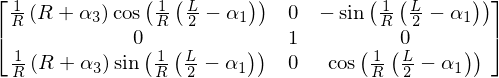

In [119]:
dx1da1=R1.dot(N.i)
dx1da2=R2.dot(N.i)
dx1da3=R3.dot(N.i)

dx2da1=R1.dot(N.j)
dx2da2=R2.dot(N.j)
dx2da3=R3.dot(N.j)

dx3da1=R1.dot(N.k)
dx3da2=R2.dot(N.k)
dx3da3=R3.dot(N.k)

A=Matrix([[dx1da1, dx1da2, dx1da3], [dx2da1, dx2da2, dx2da3], [dx3da1, dx3da2, dx3da3]])
simplify(A)

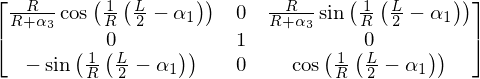

In [120]:
A_inv = trigsimp(A**-1)
simplify(trigsimp(A_inv))

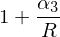

In [121]:
trigsimp(A.det())

#### Metric tensor

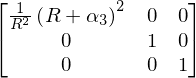

In [122]:
g11=R1.dot(R1)
g12=R1.dot(R2)
g13=R1.dot(R3)

g21=R2.dot(R1)
g22=R2.dot(R2)
g23=R2.dot(R3)

g31=R3.dot(R1)
g32=R3.dot(R2)
g33=R3.dot(R3)

G=Matrix([[g11, g12, g13],[g21, g22, g23], [g31, g32, g33]])
G=trigsimp(G)
G

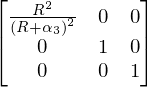

In [123]:
g_11=R_1.dot(R_1)
g_12=R_1.dot(R_2)
g_13=R_1.dot(R_3)

g_21=R_2.dot(R_1)
g_22=R_2.dot(R_2)
g_23=R_2.dot(R_3)

g_31=R_3.dot(R_1)
g_32=R_3.dot(R_2)
g_33=R_3.dot(R_3)

G_con=Matrix([[g_11, g_12, g_13],[g_21, g_22, g_23], [g_31, g_32, g_33]])
G_con=trigsimp(G_con)
G_con

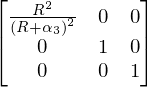

In [124]:
G_inv = G**-1
G_inv

#### Derivative of base vectors

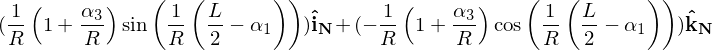

In [125]:
dR1dalpha1 = trigsimp(R1.diff(alpha1))
dR1dalpha1

$ \frac { d\vec{R_1} } { d\alpha_1} = \frac {1}{R} \left( 1-\frac{\alpha_3}{R} \right) \vec{R_3} $

In [126]:
dR1dalpha2 = trigsimp(R1.diff(alpha2))
dR1dalpha2

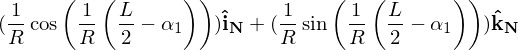

In [127]:
dR1dalpha3 = trigsimp(R1.diff(alpha3))
dR1dalpha3

$ \frac { d\vec{R_1} } { d\alpha_3} = -\frac {1}{R} \frac {1}{1-\frac{\alpha_3}{R}}  \vec{R_1} $

In [128]:
dR2dalpha1 = trigsimp(R2.diff(alpha1))
dR2dalpha1

In [129]:
dR2dalpha2 = trigsimp(R2.diff(alpha2))
dR2dalpha2

In [130]:
dR2dalpha3 = trigsimp(R2.diff(alpha3))
dR2dalpha3

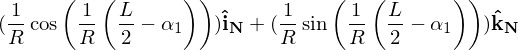

In [131]:
dR3dalpha1 = trigsimp(R3.diff(alpha1))
dR3dalpha1

$ \frac { d\vec{R_3} } { d\alpha_1} = -\frac {1}{R} \frac {1}{1-\frac{\alpha_3}{R}}  \vec{R_1} $

In [132]:
dR3dalpha2 = trigsimp(R3.diff(alpha2))
dR3dalpha2

In [133]:
dR3dalpha3 = trigsimp(R3.diff(alpha3))
dR3dalpha3

$ \frac { d\vec{R_3} } { d\alpha_3} = \vec{0} $

#### Derivative of vectors

$ \vec{u} = u^1 \vec{R_1} + u^2\vec{R_2} + u^3\vec{R_3} $

$ \frac { d\vec{u} } { d\alpha_1} =  \frac { d(u^1\vec{R_1}) } { d\alpha_1} + \frac { d(u^2\vec{R_2}) } { d\alpha_1}+ \frac { d(u^3\vec{R_3}) } { d\alpha_1} =  \frac { du^1 } { d\alpha_1} \vec{R_1} + u^1 \frac { d\vec{R_1} } { d\alpha_1} + \frac { du^2 } { d\alpha_1} \vec{R_2} + u^2 \frac { d\vec{R_2} } { d\alpha_1} + \frac { du^3 } { d\alpha_1} \vec{R_3} + u^3 \frac { d\vec{R_3} } { d\alpha_1} = \frac { du^1 } { d\alpha_1} \vec{R_1} + u^1 \frac {1}{R} \left( 1-\frac{\alpha_3}{R} \right) \vec{R_3} + \frac { du^2 } { d\alpha_1} \vec{R_2}+ \frac { du^3 } { d\alpha_1} \vec{R_3} - u^3 \frac {1}{R} \frac {1}{1-\frac{\alpha_3}{R}}  \vec{R_1}$

Then
$ \frac { d\vec{u} } { d\alpha_1} = \left( \frac { du^1 } { d\alpha_1} - u^3 \frac {1}{R} \frac {1}{1-\frac{\alpha_3}{R}}  \right) \vec{R_1} + \frac { du^2 } { d\alpha_1} \vec{R_2} + \left( \frac { du^3 } { d\alpha_1} + u^1 \frac {1}{R} \left( 1-\frac{\alpha_3}{R} \right) \right) \vec{R_3}$



$ \frac { d\vec{u} } { d\alpha_2} =  \frac { d(u^1\vec{R_1}) } { d\alpha_2} + \frac { d(u^2\vec{R_2}) } { d\alpha_2}+ \frac { d(u^3\vec{R_3}) } { d\alpha_2} =  \frac { du^1 } { d\alpha_2} \vec{R_1} + \frac { du^2 } { d\alpha_2} \vec{R_2} + \frac { du^3 } { d\alpha_2} \vec{R_3} $

Then
$ \frac { d\vec{u} } { d\alpha_2} = \frac { du^1 } { d\alpha_2} \vec{R_1} + \frac { du^2 } { d\alpha_2} \vec{R_2} + \frac { du^3 } { d\alpha_2} \vec{R_3} $

$ \frac { d\vec{u} } { d\alpha_3} = \frac { d(u^1\vec{R_1}) } { d\alpha_3} + \frac { d(u^2\vec{R_2}) } { d\alpha_3}+ \frac { d(u^3\vec{R_3}) } { d\alpha_3} = 
 \frac { du^1 } { d\alpha_3} \vec{R_1} + u^1 \frac { d\vec{R_1} } { d\alpha_3} + \frac { du^2 } { d\alpha_3} \vec{R_2} + u^2 \frac { d\vec{R_2} } { d\alpha_3} + \frac { du^3 } { d\alpha_3} \vec{R_3} + u^3 \frac { d\vec{R_3} } { d\alpha_3} = \frac { du^1 } { d\alpha_3} \vec{R_1} - u^1 \frac {1}{R} \frac {1}{1-\frac{\alpha_3}{R}}  \vec{R_1} + \frac { du^2 } { d\alpha_3} \vec{R_2}+ \frac { du^3 } { d\alpha_3} \vec{R_3} $
 
 Then
$ \frac { d\vec{u} } { d\alpha_3} = \left( \frac { du^1 } { d\alpha_3}  - u^1 \frac {1}{R} \frac {1}{1-\frac{\alpha_3}{R}} \right) \vec{R_1} + \frac { du^2 } { d\alpha_3} \vec{R_2}+ \frac { du^3 } { d\alpha_3} \vec{R_3}$



#### Gradient of vector

$\nabla_1 u^1 = \frac { \partial u^1 } { \partial \alpha_1} - u^3 \frac {1}{R} \frac {1}{1-\frac{\alpha_3}{R}}$

$\nabla_1 u^2 = \frac { \partial u^2 } { \partial \alpha_1} $

$\nabla_1 u^3 = \frac { \partial u^3 } { \partial \alpha_1} + u^1 \frac {1}{R} \left( 1-\frac{\alpha_3}{R} \right) $

$\nabla_2 u^1 = \frac { \partial u^1 } { \partial \alpha_2}$

$\nabla_2 u^2 = \frac { \partial u^2 } { \partial \alpha_2}$

$\nabla_2 u^3 = \frac { \partial u^3 } { \partial \alpha_2}$

$\nabla_3 u^1 = \frac { \partial u^1 } { \partial \alpha_3}  - u^1 \frac {1}{R} \frac {1}{1-\frac{\alpha_3}{R}}$

$\nabla_3 u^2 = \frac { \partial u^2 } { \partial \alpha_3} $

$\nabla_3 u^3 = \frac { \partial u^3 } { \partial \alpha_3}$


$ \nabla \vec{u} = \left( 
\begin{array}{ccc} 
\nabla_1 u^1 & \nabla_1 u^2 & \nabla_1 u^3 \\
\nabla_2 u^1 & \nabla_2 u^2 & \nabla_2 u^3 \\
\nabla_3 u^1 & \nabla_3 u^2 & \nabla_3 u^3 \\
\end{array} 
\right)$

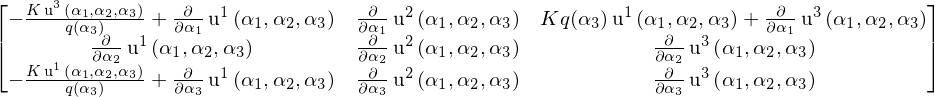

In [134]:
u1=Function('u^1')
u2=Function('u^2')
u3=Function('u^3')
q=Function('q') # q(alpha3) = 1-alpha3/R
K = Symbol('K') # K = 1/R

u1_nabla1 = u1(alpha1, alpha2, alpha3).diff(alpha1) - u3(alpha1, alpha2, alpha3) * K / q(alpha3)
u2_nabla1 = u2(alpha1, alpha2, alpha3).diff(alpha1)
u3_nabla1 = u3(alpha1, alpha2, alpha3).diff(alpha1) + u1(alpha1, alpha2, alpha3) * K * q(alpha3)

u1_nabla2 = u1(alpha1, alpha2, alpha3).diff(alpha2)
u2_nabla2 = u2(alpha1, alpha2, alpha3).diff(alpha2)
u3_nabla2 = u3(alpha1, alpha2, alpha3).diff(alpha2)

u1_nabla3 = u1(alpha1, alpha2, alpha3).diff(alpha3) - u1(alpha1, alpha2, alpha3) * K / q(alpha3)
u2_nabla3 = u2(alpha1, alpha2, alpha3).diff(alpha3)
u3_nabla3 = u3(alpha1, alpha2, alpha3).diff(alpha3)
# $\nabla_2 u^2 = \frac { \partial u^2 } { \partial \alpha_2}$

grad_u = Matrix([[u1_nabla1, u2_nabla1, u3_nabla1],[u1_nabla2, u2_nabla2, u3_nabla2], [u1_nabla3, u2_nabla3, u3_nabla3]])
grad_u

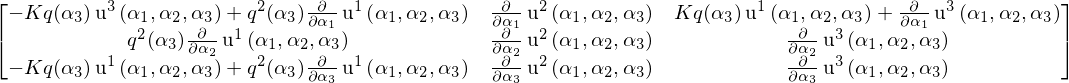

In [135]:
G_s = Matrix([[q(alpha3)**2, 0, 0],[0, 1, 0], [0, 0, 1]])
grad_u_down=grad_u*G_s
expand(simplify(grad_u_down))

$ 
\left( 
\begin{array}{c} 
\nabla_1 u_1 \\ \nabla_2 u_1 \\ \nabla_3 u_1 \\
\nabla_1 u_2 \\ \nabla_2 u_2 \\ \nabla_3 u_2 \\
\nabla_1 u_3 \\ \nabla_2 u_3 \\ \nabla_3 u_3 \\
\end{array} 
\right) 
=  
\left( 
\begin{array}{c}
\left( 1-\frac{\alpha_2}{R} \right)^2  \frac { \partial u^1 } { \partial \alpha_1} - u^3 \frac {\left( 1-\frac{\alpha_3}{R} \right)}{R} \\
\left( 1-\frac{\alpha_2}{R} \right)^2 \frac { \partial u^1 } { \partial \alpha_2} \\
\left( 1-\frac{\alpha_3}{R} \right)^2  \frac { \partial u^1 } { \partial \alpha_3} - u^1 \frac {\left( 1-\frac{\alpha_3}{R} \right)}{R} \\
\frac { \partial u^2 } { \partial \alpha_1} \\
\frac { \partial u^2 } { \partial \alpha_2} \\
\frac { \partial u^2 } { \partial \alpha_3} \\
\frac { \partial u^3 } { \partial \alpha_1} + u^1 \frac {\left( 1-\frac{\alpha_3}{R} \right)}{R} \\
\frac { \partial u^3 } { \partial \alpha_2} \\
\frac { \partial u^3 } { \partial \alpha_3} \\
\end{array} 
\right)
$

$ 
\left( 
\begin{array}{c} 
\nabla_1 u_1 \\ \nabla_2 u_1 \\ \nabla_3 u_1 \\
\nabla_1 u_2 \\ \nabla_2 u_2 \\ \nabla_3 u_2 \\
\nabla_1 u_3 \\ \nabla_2 u_3 \\ \nabla_3 u_3 \\
\end{array} 
\right)
=  
B \cdot
\left( 
\begin{array}{c} 
u^1 \\
\frac { \partial u^1 } { \partial \alpha_1} \\
\frac { \partial u^1 } { \partial \alpha_2} \\
\frac { \partial u^1 } { \partial \alpha_3} \\
u^2 \\
\frac { \partial u^2 } { \partial \alpha_1} \\
\frac { \partial u^2 } { \partial \alpha_2} \\
\frac { \partial u^2 } { \partial \alpha_3} \\
u^3 \\
\frac { \partial u^3 } { \partial \alpha_1} \\
\frac { \partial u^3 } { \partial \alpha_2} \\
\frac { \partial u^3 } { \partial \alpha_3} \\
\end{array} 
\right) 
$

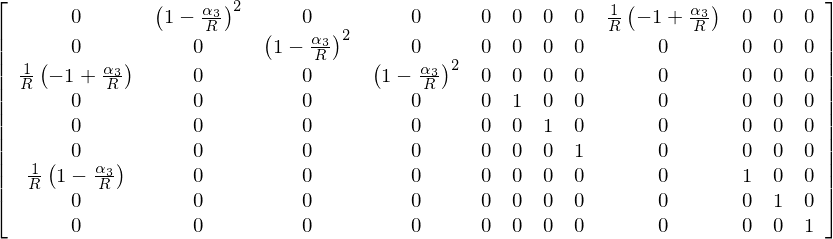

In [136]:
B = zeros(9, 12)
B[0,1] = (1-alpha3/R)**2
B[0,8] = -(1-alpha3/R)/R

B[1,2] = (1-alpha3/R)**2

B[2,0] = -(1-alpha3/R)/R
B[2,3] = (1-alpha3/R)**2

B[3,5] = S(1)
B[4,6] = S(1)
B[5,7] = S(1)

B[6,9] = S(1)
B[6,0] = (1-alpha3/R)/R
B[7,10] = S(1)
B[8,11] = S(1)

B

### Elasticity tensor(stiffness tensor)

#### General form

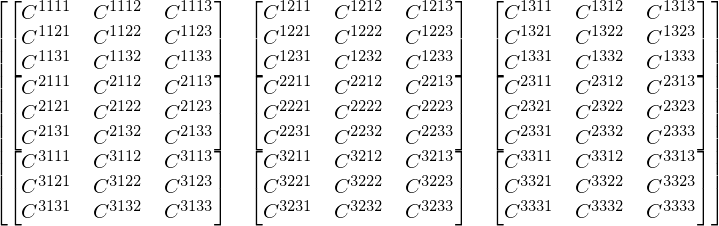

In [137]:
from sympy import MutableDenseNDimArray
C_x = MutableDenseNDimArray.zeros(3, 3, 3, 3)

for i in range(3):
    for j in range(3):        
        for k in range(3):
            for l in range(3):
                elem_index = 'C^{{{}{}{}{}}}'.format(i+1, j+1, k+1, l+1)
                el = Symbol(elem_index)
                C_x[i,j,k,l] = el
                
C_x

#### Include symmetry

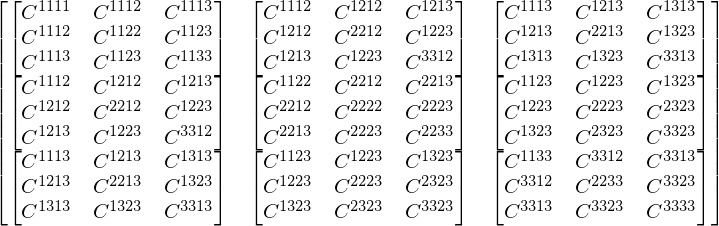

In [138]:
C_x_symmetry = MutableDenseNDimArray.zeros(3, 3, 3, 3)

def getCIndecies(index):
    if (index == 0):
        return 0, 0
    elif (index == 1):
        return 1, 1
    elif (index == 2):
        return 2, 2
    elif (index == 3):
        return 0, 1
    elif (index == 4):
        return 0, 2
    elif (index == 5):
        return 1, 2
    
for s in range(6):
    for t in range(s, 6):
        i,j = getCIndecies(s)
        k,l = getCIndecies(t)
        elem_index = 'C^{{{}{}{}{}}}'.format(i+1, j+1, k+1, l+1)
        el = Symbol(elem_index)
        C_x_symmetry[i,j,k,l] = el
        C_x_symmetry[i,j,l,k] = el
        C_x_symmetry[j,i,k,l] = el
        C_x_symmetry[j,i,l,k] = el
        C_x_symmetry[k,l,i,j] = el
        C_x_symmetry[k,l,j,i] = el
        C_x_symmetry[l,k,i,j] = el
        C_x_symmetry[l,k,j,i] = el

                
C_x_symmetry

#### Orthotropic material

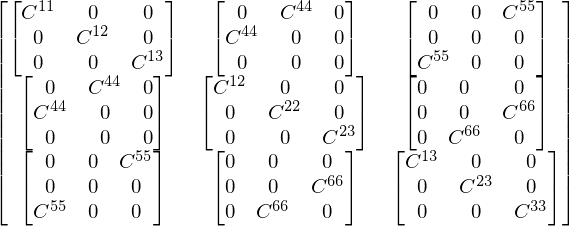

In [139]:
C_orthotropic = MutableDenseNDimArray.zeros(3, 3, 3, 3)

C_orthotropic_matrix = zeros(6)

for s in range(6):
    for t in range(s, 6):
        elem_index = 'C^{{{}{}}}'.format(s+1, t+1)
        el = Symbol(elem_index)
        if ((s < 3 and t < 3) or t == s):
            C_orthotropic_matrix[s,t] = el
            C_orthotropic_matrix[t,s] = el
            
for s in range(6):
    for t in range(s, 6):
        i,j = getCIndecies(s)
        k,l = getCIndecies(t)
        el = C_orthotropic_matrix[s, t]
        C_orthotropic[i,j,k,l] = el
        C_orthotropic[i,j,l,k] = el
        C_orthotropic[j,i,k,l] = el
        C_orthotropic[j,i,l,k] = el
        C_orthotropic[k,l,i,j] = el
        C_orthotropic[k,l,j,i] = el
        C_orthotropic[l,k,i,j] = el
        C_orthotropic[l,k,j,i] = el

                
C_orthotropic

#### Orthotropic material in shell coordinates

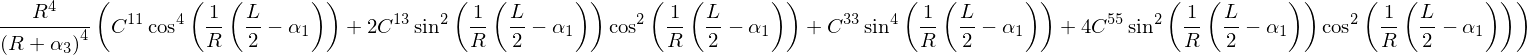

In [140]:
def getCalpha(C, A, q, p, s, t):
    res = S(0)
    for i in range(3):
        for j in range(3):        
            for k in range(3):
                for l in range(3):
                    res += C[i,j,k,l]*A[q,i]*A[p,j]*A[s,k]*A[t,l]
    return simplify(trigsimp(res))
                    


C_orthotropic_alpha = MutableDenseNDimArray.zeros(3, 3, 3, 3)

for i in range(3):
    for j in range(3):        
        for k in range(3):
            for l in range(3):
                c = getCalpha(C_orthotropic, A_inv, i, j, k, l)
                C_orthotropic_alpha[i,j,k,l] = c

C_orthotropic_alpha[0,0,0,0]

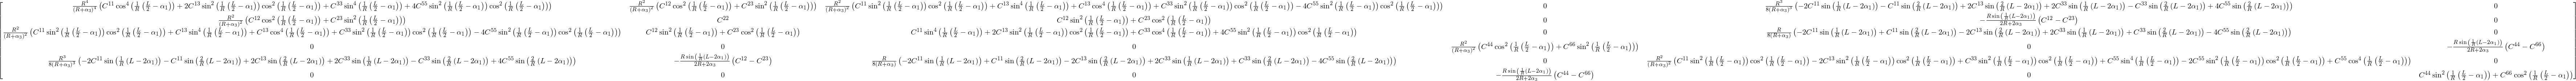

In [141]:
C_orthotropic_matrix_alpha = zeros(6)

for s in range(6):
    for t in range(6):
        i,j = getCIndecies(s)
        k,l = getCIndecies(t)
        C_orthotropic_matrix_alpha[s,t] = C_orthotropic_alpha[i,j,k,l]
        
C_orthotropic_matrix_alpha

#### Virtual work

In [79]:
def contraction3DSameRank(A,B):
    res = S(0)
    for i in range(3):
        for j in range(3):
            res += A[i,j]*B[j,i]
    return res

def contraction3D(C,e):
    res = MutableDenseNDimArray.zeros(3, 3)
    for i in range(3):
        for j in range(3):
            res[i,j] = S(0)
            for k in range(3):
                for l in range(3):
                    res[i,j] += C[i,j,k,l]*e[k,l]
    return res


In [82]:
e11 = Symbol("e_{11}")
e12 = Symbol("e_{12}")
e22 = Symbol("e_{22}")
e13 = Symbol("e_{13}")
e23 = Symbol("e_{23}")
e33 = Symbol("e_{33}")
# s11 = Symbol("s_{11}")
# s12 = Symbol("s_{12}")
# s22 = Symbol("s_{22}")

e=Matrix([[e11, e12, e13], [e12, e22, e23], [e13, e23, e33]])

s=contraction3D(C_alpha, e)

E=contraction3DSameRank(s, e)




In [83]:
E_s = trigsimp(E)


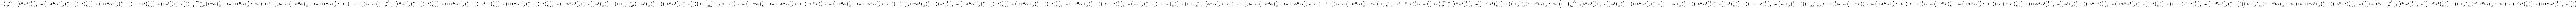

In [91]:
E_c = (collect(E, e11**2))
# E_c = collect(E_c, e11*e12)
# E_c = collect(E_c, e11*e13)
# E_c = collect(E_c, e22)
# E_c = collect(E_c, e23)
# E_c = collect(E_c, e33)
E_c